In [3]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('uber.csv')

In [13]:
del df['key']
del df['Unnamed: 0']

In [14]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [18]:
df.ffill(inplace=True)

In [19]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [20]:
from math import sqrt

lat1 = df['pickup_latitude']
lon1 = df['pickup_longitude']
lat2 = df['dropoff_latitude']
lon2 = df['dropoff_longitude']
df['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)
df.tail(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
199990,12.0,2015-05-24 22:05:56 UTC,-73.987106,40.741894,-73.952240,40.772957,1,0.046697
199991,17.5,2015-06-08 10:49:14 UTC,-73.981453,40.743919,-74.013908,40.712635,1,0.045078
199992,8.9,2010-01-30 16:24:00 UTC,-74.003548,40.714045,-73.991053,40.684500,1,0.032079
199993,9.5,2012-09-29 19:51:27 UTC,-73.987798,40.721210,-73.980960,40.744388,1,0.024166
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,0.012060
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.001064
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.022126
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,0.142223
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,0.033101
199999,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1,0.048729


<Axes: xlabel='distance', ylabel='fare_amount'>

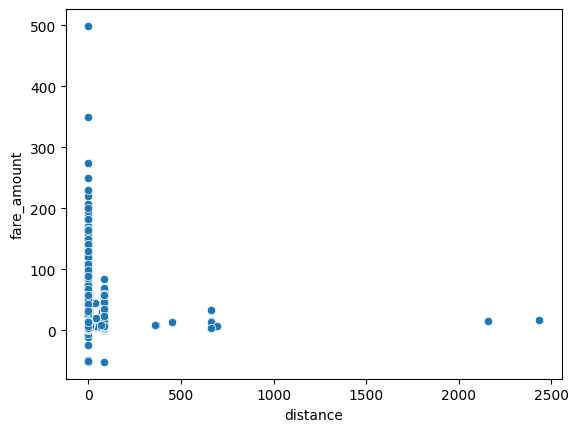

In [21]:
# plot fare vs distance
import seaborn as sns 

sns.scatterplot(x='distance', y='fare_amount', data=df)


In [23]:
# calculate fare per person

df['fare_pp'] = df['fare_amount'] / df['passenger_count']

df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_pp
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.015140,7.500000
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.022103,7.700000
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.053109,12.900000
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.016528,1.766667
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.051031,3.200000
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.001064,3.000000
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.022126,7.500000
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,0.142223,15.450000
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,0.033101,14.500000


<Axes: xlabel='distance', ylabel='fare_pp'>

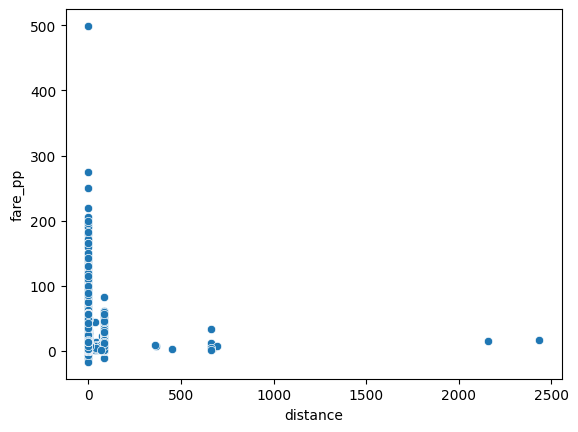

In [24]:
# fare per person vs distance
sns.scatterplot(x='distance', y='fare_pp', data=df)

In [27]:
# remove outliars

df = df[df['fare_amount'] > 0]

df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,fare_pp
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0.015140,7.500000
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0.022103,7.700000
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0.053109,12.900000
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0.016528,1.766667
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0.051031,3.200000
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.001064,3.000000
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,0.022126,7.500000
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,0.142223,15.450000
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,0.033101,14.500000


In [33]:
# apply linear regression
from sklearn.model_selection import train_test_split

# split fare 

y = df['fare_amount']
# remaining columns get distance and passenger count
X = df[['distance', 'passenger_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.00014475493305676768

In [36]:
X_test

,distance,passenger_count
123358,0.073303,3
50057,0.037994,1
167361,0.006324,5
88074,0.023340,2
105143,0.054117,1
...,...,...
80097,0.113466,1
38123,0.097792,1
89114,0.010322,5
182117,0.009778,1


In [35]:
lr.predict(X_test)

array([11.44367563, 11.29882053, 11.58697881, ..., 11.58703947,
       11.29839245, 11.29855832])